In [3]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load the dataset
df=pd.read_csv(r'C:\Users\Nitro\Desktop\Python\Practical\titanic.csv')

In [5]:
#Extract the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.shape

(891, 12)

In [12]:
# Check unique values in categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in {col}:\n", df[col].unique())

Unique values in Name:
 ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss.

In [13]:
#Checking for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [15]:
#Handling the missing values
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].mean(), inplace=True)

C:\Users\Nitro\AppData\Local\Temp\ipykernel_9268\2350003615.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Nitro\AppData\Local\Temp\ipykernel_9268\2350003615.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [16]:
#after handling missing values
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [44]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.000000,0.0,1.0,0.121348,1.0,0.346939,0.5,0.0,0.767164,0.139423,0.0,1.0
2,0.002247,1.0,1.0,0.396629,0.0,0.428571,0.0,0.0,0.985075,0.152404,0.0,1.0
4,0.004494,0.0,1.0,0.016854,1.0,0.612245,0.0,0.0,0.691045,0.154808,0.0,1.0
5,0.005618,0.0,1.0,0.622472,1.0,0.504064,0.0,0.0,0.397015,0.162660,0.0,0.5
9,0.010112,1.0,0.5,0.647191,0.0,0.183673,0.5,0.0,0.183582,0.578285,0.0,0.0
12,0.013483,0.0,1.0,0.819101,1.0,0.306122,0.0,0.0,0.785075,0.154808,0.0,1.0
14,0.015730,0.0,1.0,0.943820,0.0,0.183673,0.0,0.0,0.602985,0.151042,0.0,1.0
17,0.019101,1.0,0.5,0.974157,1.0,0.504064,0.0,0.0,0.211940,0.250000,0.0,1.0
18,0.020225,0.0,1.0,0.942697,0.0,0.530612,0.5,0.0,0.435821,0.346154,0.0,1.0
19,0.021348,1.0,1.0,0.575281,0.0,0.504064,0.0,0.0,0.261194,0.138942,0.0,0.0


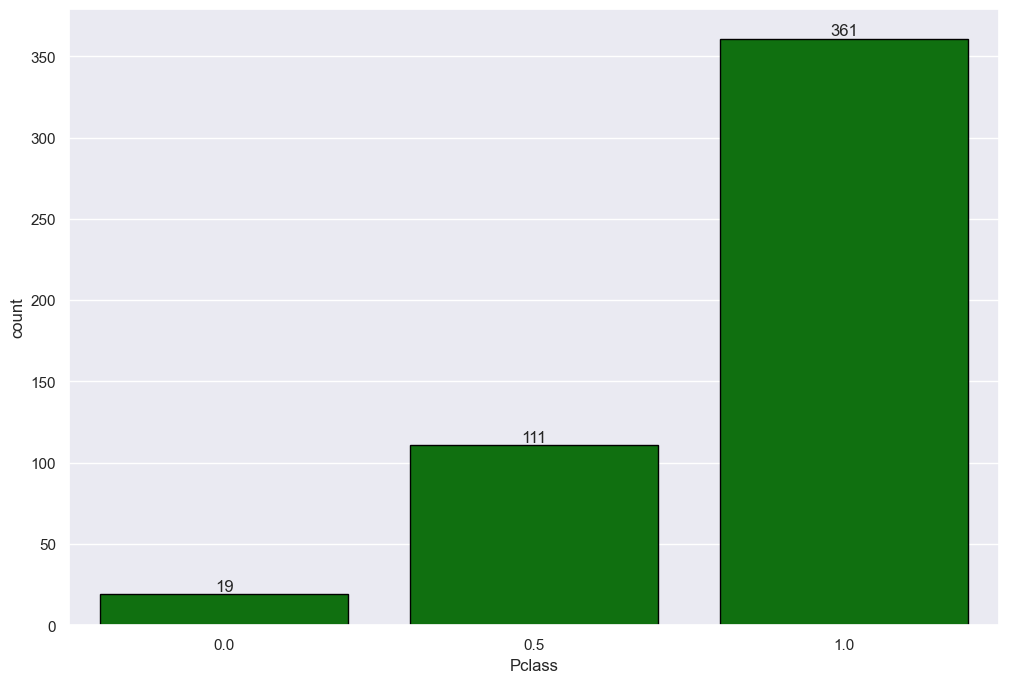

In [45]:
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.countplot(data = df, x = 'Pclass', color='green', edgecolor='black')

for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
#label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col]=label_enc.fit_transform(df[col])

In [18]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns, drop_first=True)

In [20]:
#Check for duplicates
print(f"Duplicates in the dataset:  {df.duplicated().sum()}")

#Replace duplicates
df.drop_duplicates(inplace=True)

print(f"After removing the duplicates from the dataset: {df.duplicated().sum()}")

Duplicates in the dataset:  0
After removing the duplicates from the dataset: 0


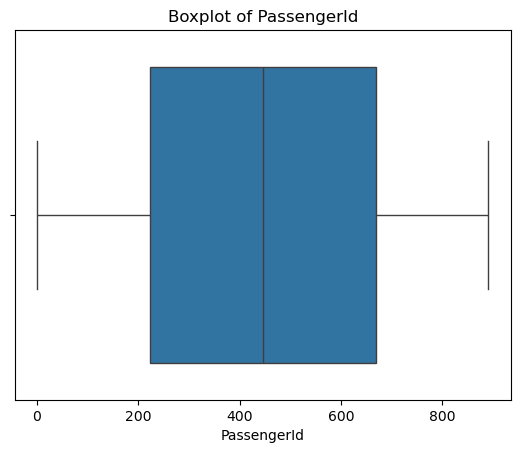

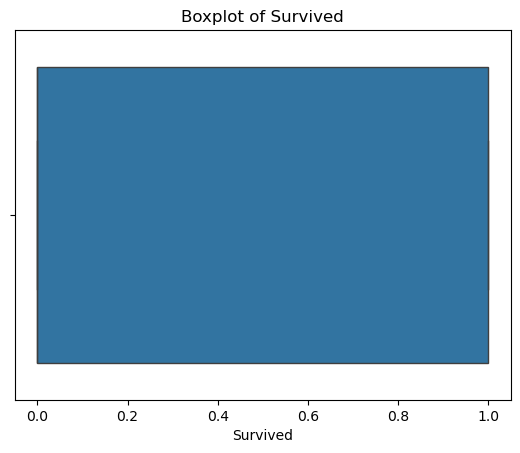

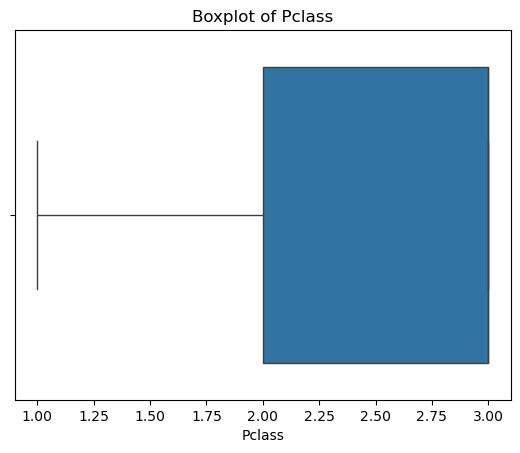

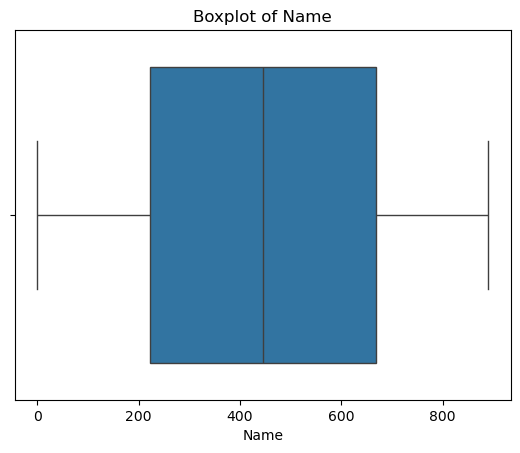

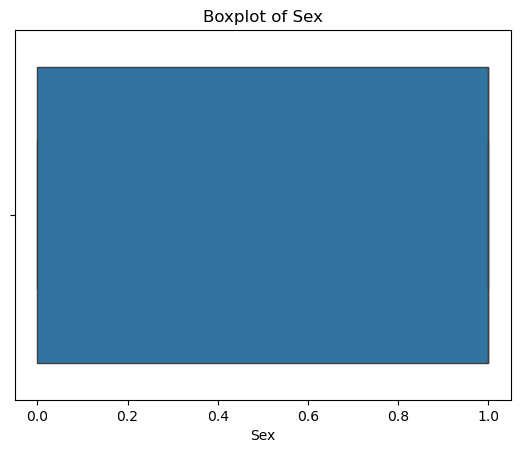

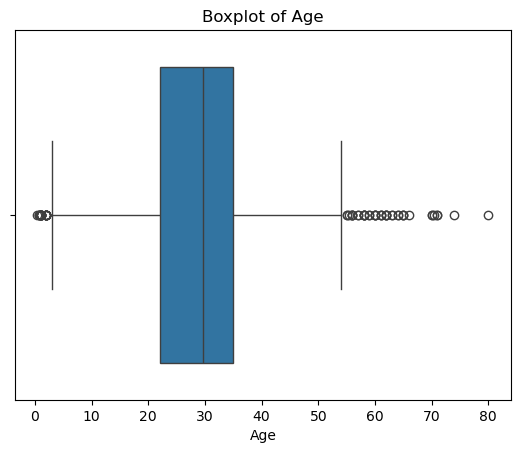

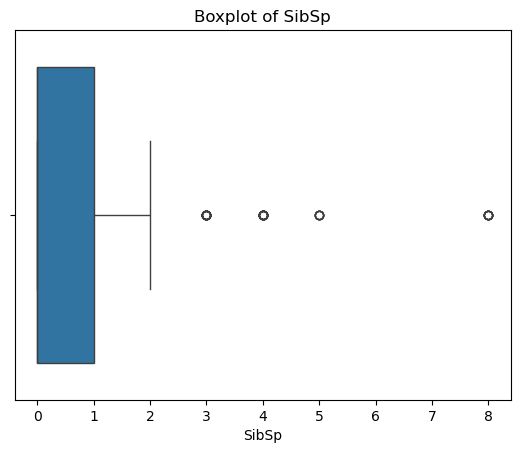

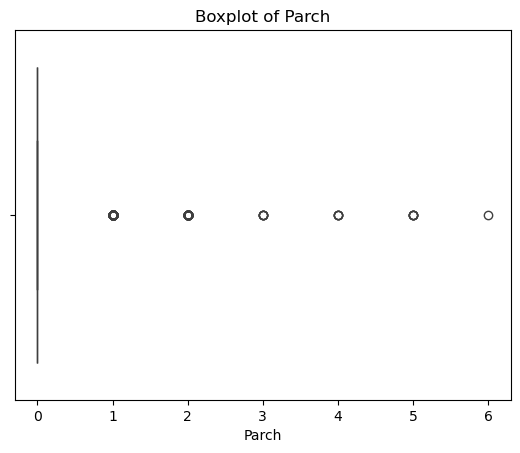

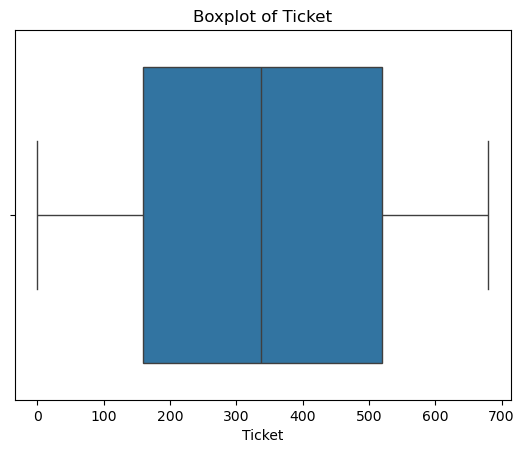

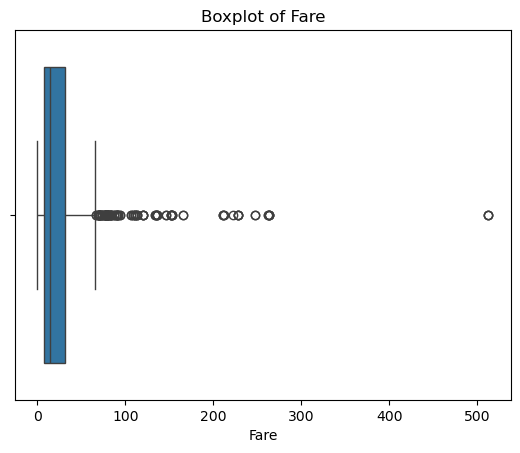

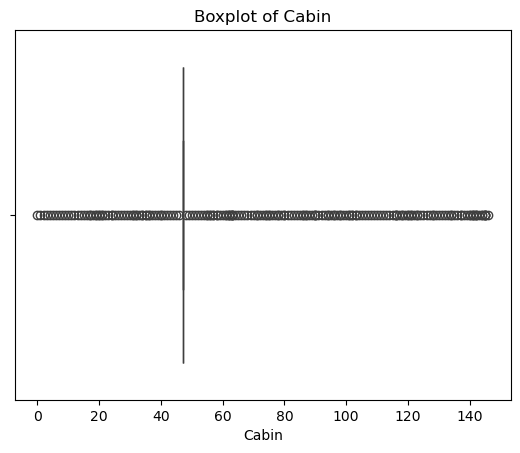

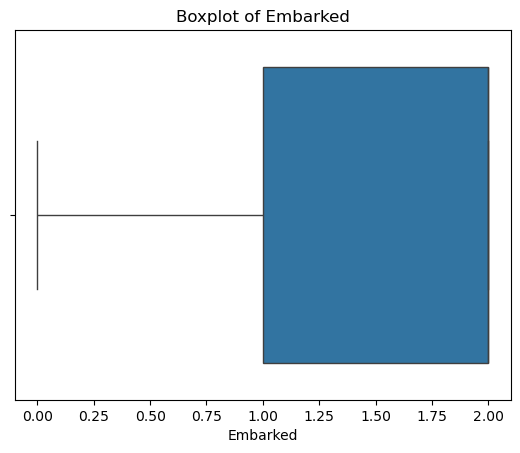

In [22]:
#  Check for outliers using boxplot

# Example: Boxplot to visualize outliers
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

# Example: Remove outliers using the IQR method
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

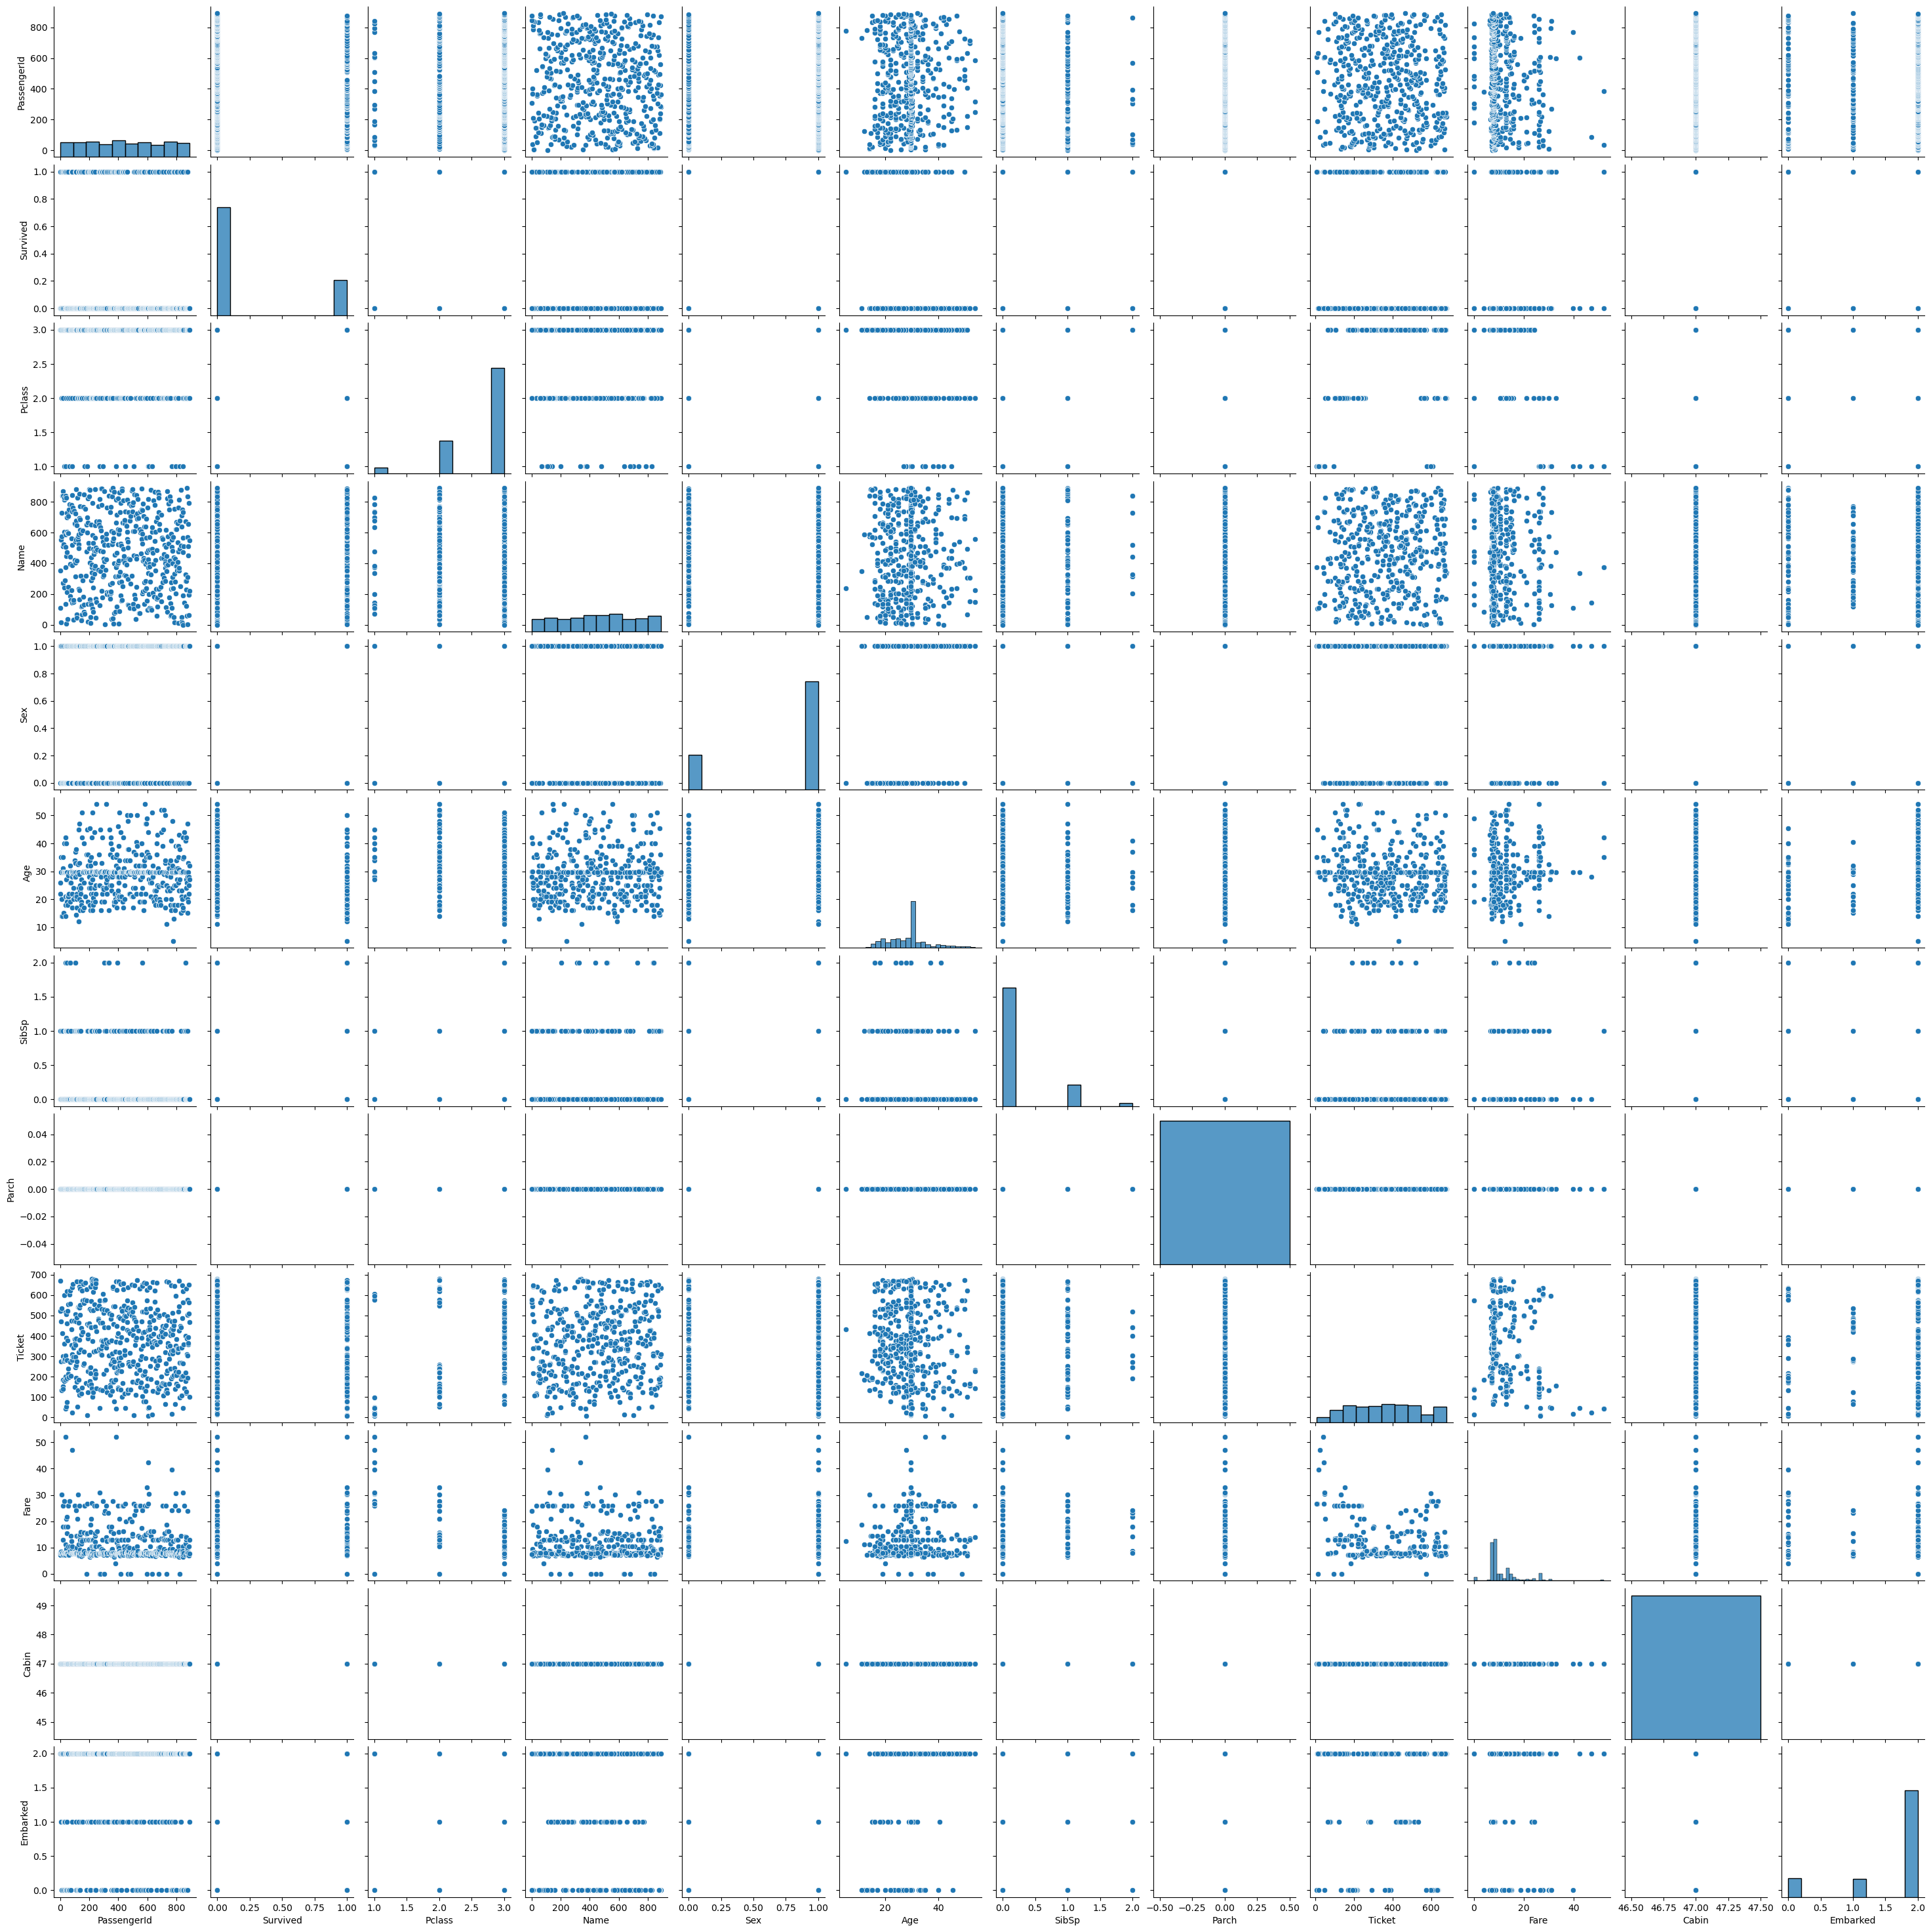

In [23]:
# Pair plot for numerical columns
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  491 non-null    int64  
 1   Survived     491 non-null    int64  
 2   Pclass       491 non-null    int64  
 3   Name         491 non-null    int32  
 4   Sex          491 non-null    int32  
 5   Age          491 non-null    float64
 6   SibSp        491 non-null    int64  
 7   Parch        491 non-null    int64  
 8   Ticket       491 non-null    int32  
 9   Fare         491 non-null    float64
 10  Cabin        491 non-null    int32  
 11  Embarked     491 non-null    int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 40.3 KB


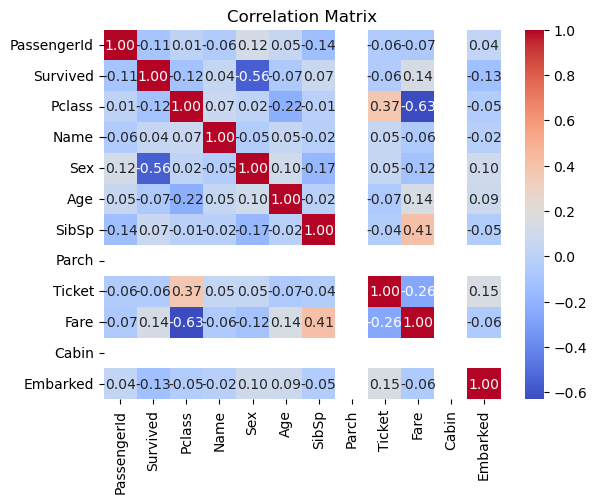

In [26]:
# Select only numerical columns
numeric_df = df.select_dtypes(include='number')

# Check for multicollinearity using a heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

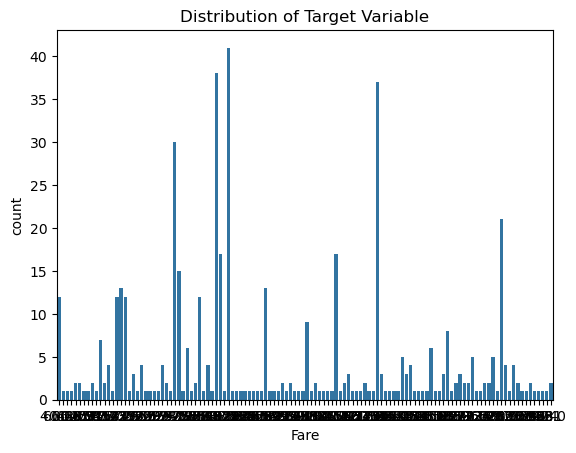

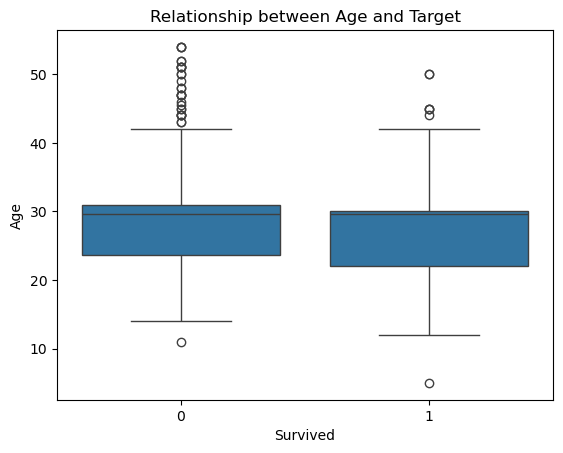

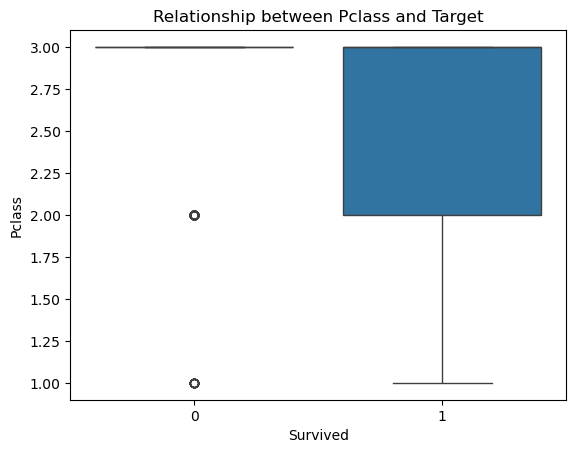

In [28]:
# Distribution of the target variable
sns.countplot(data=df, x='Fare')
plt.title('Distribution of Target Variable')
plt.show()

# Relationship between target and other features
for col in ['Age', 'Pclass']:
    sns.boxplot(data=df, x='Survived', y=col)
    plt.title(f'Relationship between {col} and Target')
    plt.show()

In [29]:
# Correlation with the target variable
correlation_with_target = df.corr()['Fare'].sort_values(ascending=False)
print("Correlation with Target Variable:\n", correlation_with_target)

Correlation with Target Variable:
 Fare           1.000000
SibSp          0.408355
Age            0.144959
Survived       0.136812
Name          -0.062921
Embarked      -0.063062
PassengerId   -0.069416
Sex           -0.117751
Ticket        -0.259329
Pclass        -0.631394
Parch               NaN
Cabin               NaN
Name: Fare, dtype: float64


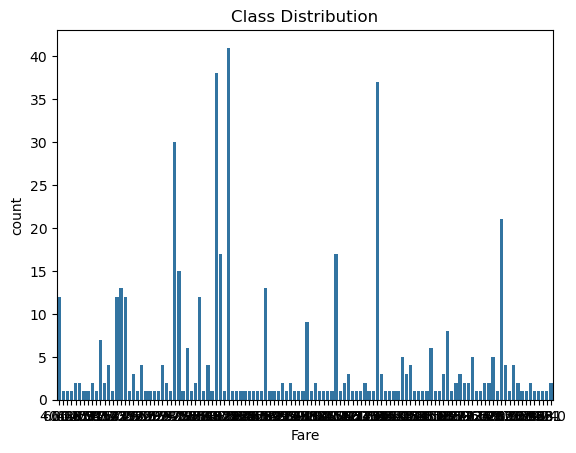

In [30]:
# Check class distribution
sns.countplot(data=df, x='Fare')
plt.title('Class Distribution')
plt.show()

Grouped Statistics by Fare:
               Age    Pclass
Fare                        
0.0000   31.241152  2.166667
4.0125   20.000000  3.000000
6.4375   34.500000  3.000000
6.4500   43.000000  3.000000
6.4958   26.000000  3.000000
...            ...       ...
33.0000  29.699118  2.000000
39.6000  29.699118  1.000000
42.4000  29.699118  1.000000
47.1000  28.000000  1.000000
52.0000  38.500000  1.000000

[120 rows x 2 columns]


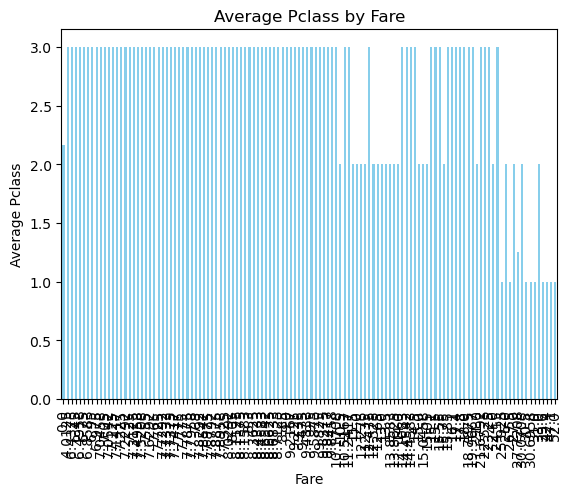

In [31]:
#Grouped Analysis
# Grouped statistics for numerical features
print("Grouped Statistics by Fare:")
print(df.groupby('Fare')[['Age', 'Pclass']].mean())

# Bar plot for average salary by leaveornot
df.groupby('Fare')['Pclass'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Pclass by Fare')
plt.xlabel('Fare')
plt.ylabel('Average Pclass')
plt.show()

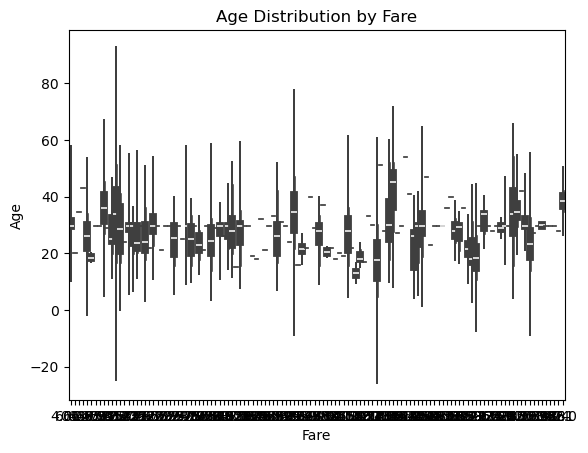

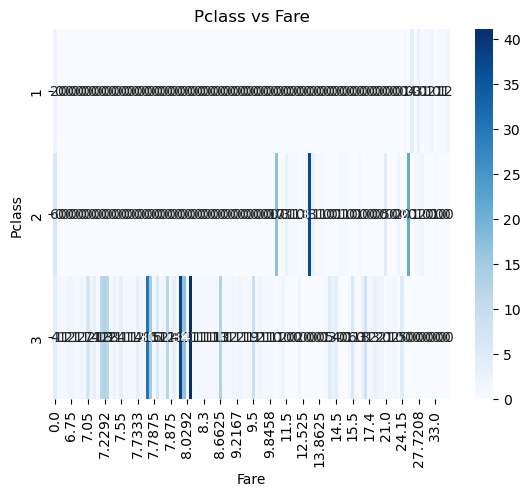

In [32]:
#Advanced Visualizations
# Violin plot for age distribution by leaveornot
sns.violinplot(data=df, x='Fare', y='Age')
plt.title('Age Distribution by Fare')
plt.show()

# Heatmap for categorical variables
sns.heatmap(pd.crosstab(df['Pclass'], df['Fare']), annot=True, cmap='Blues', fmt='d')
plt.title('Pclass vs Fare')
plt.show()

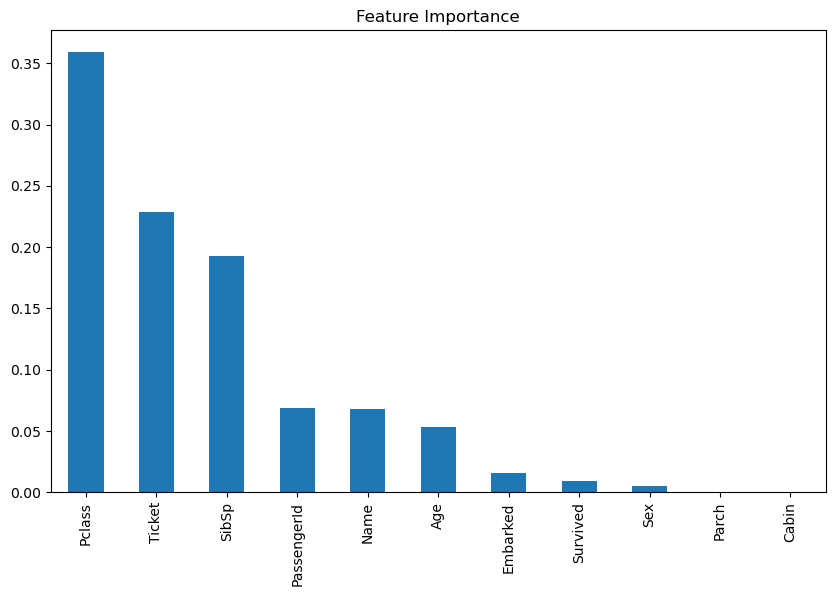

In [ ]:
#Feature Importance
from sklearn.ensemble import RandomForestRegressor

# Feature importance using Random Forest Regressor
X = df.drop('Fare', axis=1)
y = df['Fare']

model = RandomForestRegressor()
model.fit(X, y)

# Plot feature importance
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

In [35]:
# Check skewness of numerical columns
from scipy.stats import skew

for col in df.select_dtypes(include='number').columns:
    print(f"Skewness of {col}: {skew(df[col])}")

Skewness of PassengerId: 0.024652786609009866
Skewness of Survived: 1.1768085089327183
Skewness of Pclass: -1.5776288483737133
Skewness of Name: -0.05965756098924038
Skewness of Sex: -1.202473655963551
Skewness of Age: 0.645458500592429
Skewness of SibSp: 2.24764262942371
Skewness of Parch: nan
Skewness of Ticket: 0.03600954390324346
Skewness of Fare: 2.1821205222846456
Skewness of Cabin: nan
Skewness of Embarked: -1.5172253503126463


C:\Users\Nitro\AppData\Local\Temp\ipykernel_9268\3280632757.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print(f"Skewness of {col}: {skew(df[col])}")


In [36]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# Scale numerical columns
scaler = MinMaxScaler()
df[df.select_dtypes(include='number').columns] = scaler.fit_transform(df.select_dtypes(include='number'))

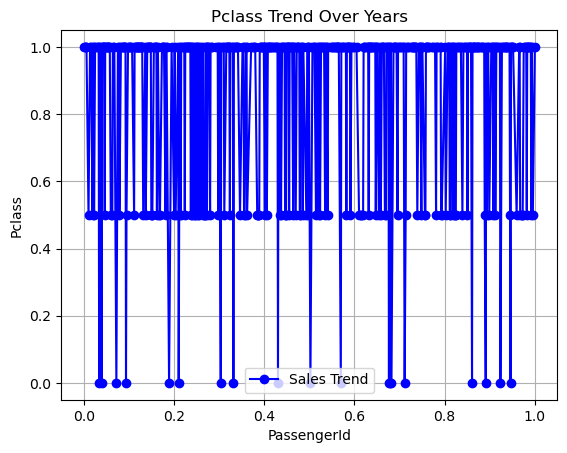

In [37]:
#Actual Columns and rows
#Code for a Line Graph
import matplotlib.pyplot as plt

# Example: Line graph for trends over time
# Replace 'year' and 'sales' with your actual column names
x = df['PassengerId']  # X-axis (e.g., years)
y = df['Pclass']  # Y-axis (e.g., sales data)

plt.plot(x, y, marker='o', linestyle='-', color='b', label='Sales Trend')
plt.title('Pclass Trend Over Years')
plt.xlabel('PassengerId')
plt.ylabel('Pclass')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Replace inf values and drop NaNs

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

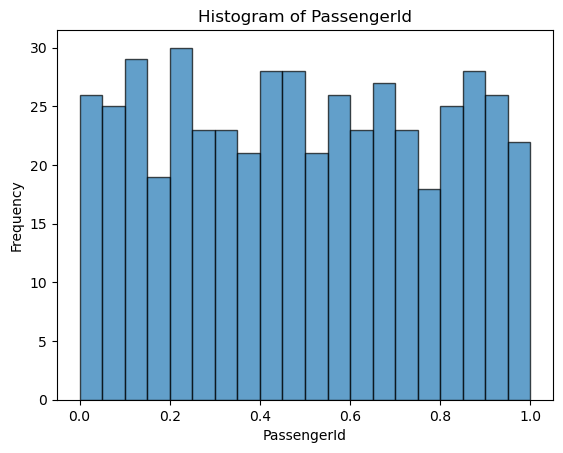

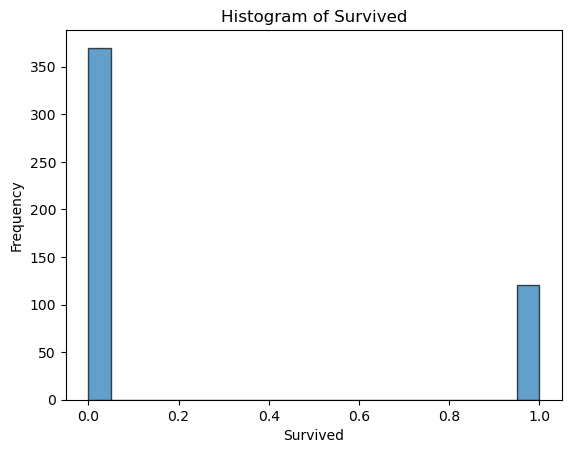

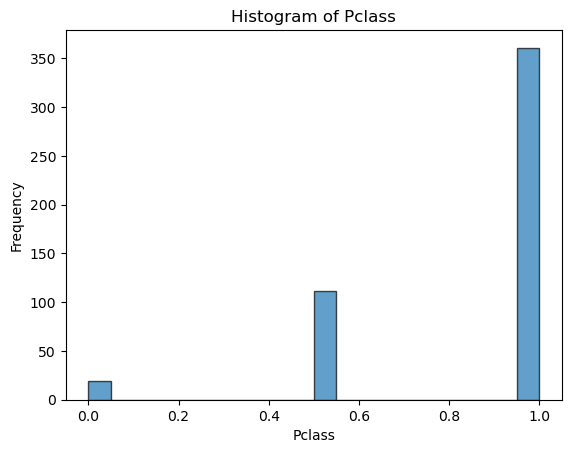

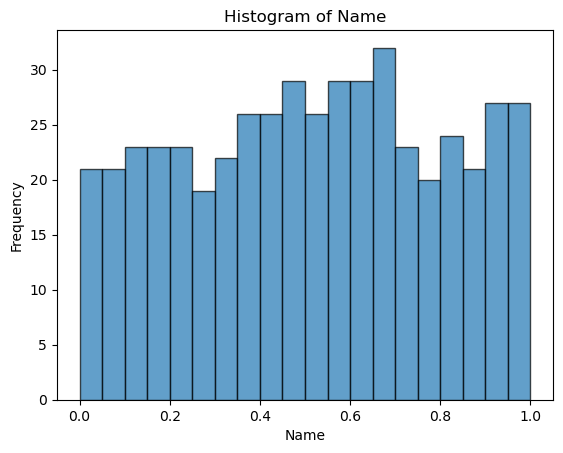

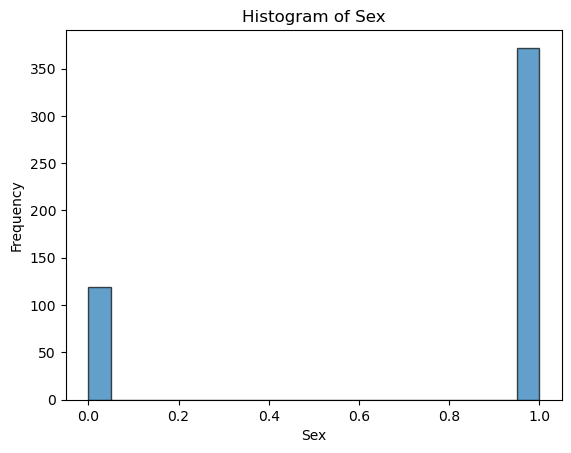

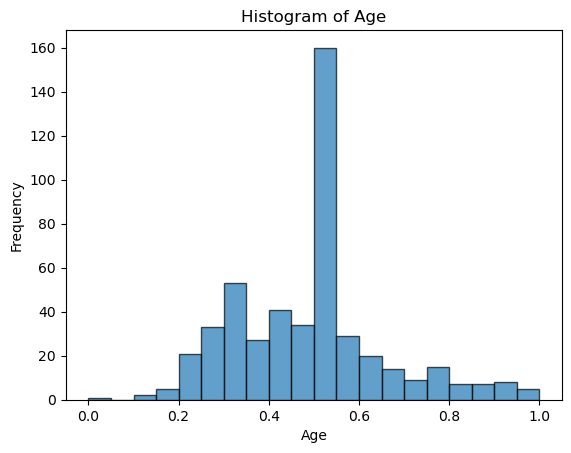

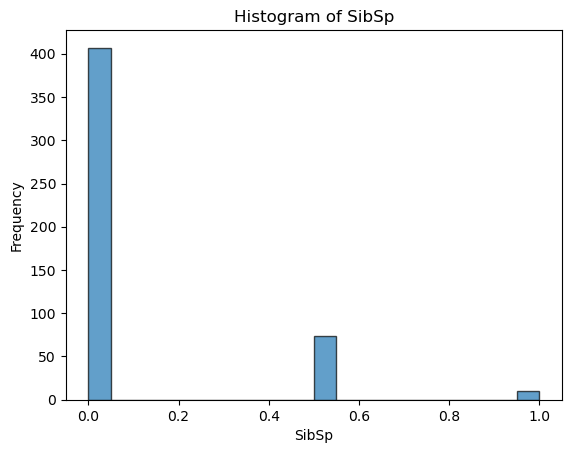

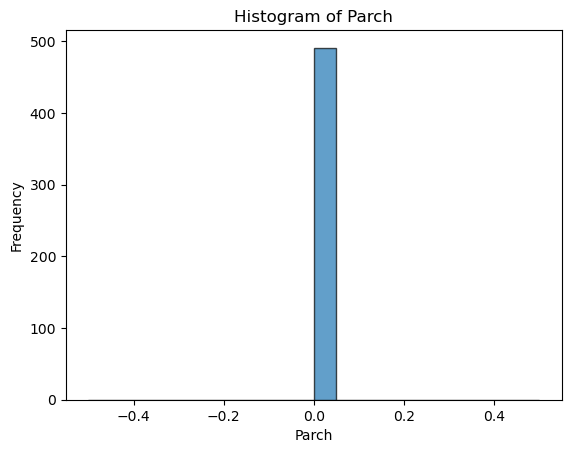

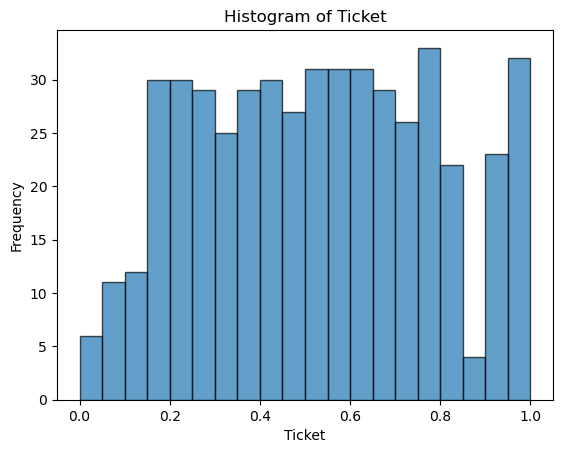

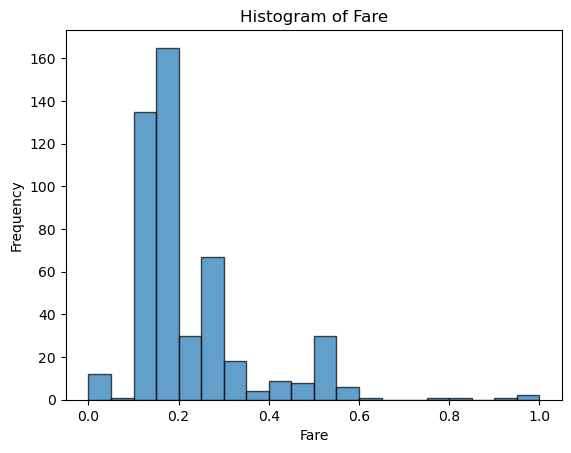

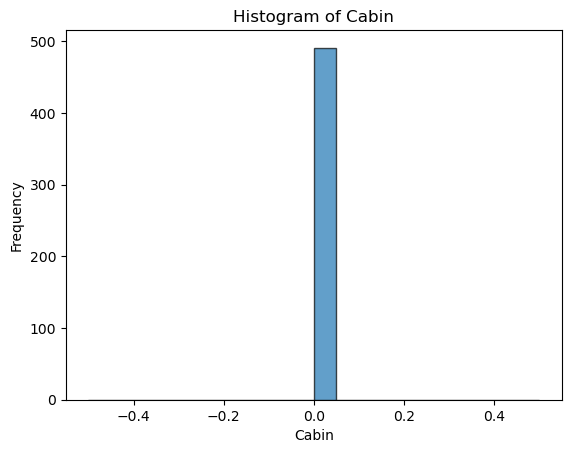

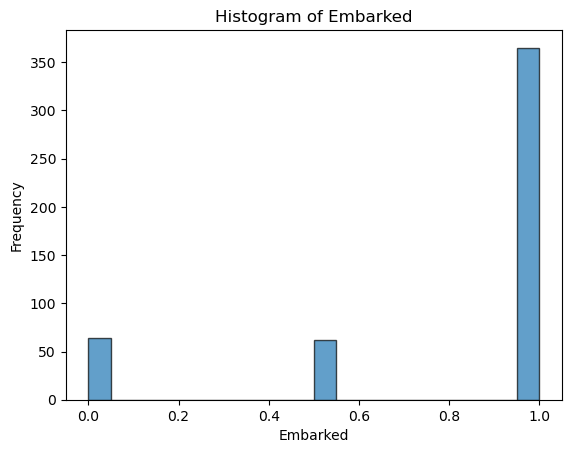

In [40]:
#Visualize Distributions Using Histograms
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
for col in df.select_dtypes(include='number').columns:
    plt.hist(df[col], bins=20, alpha=0.7, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

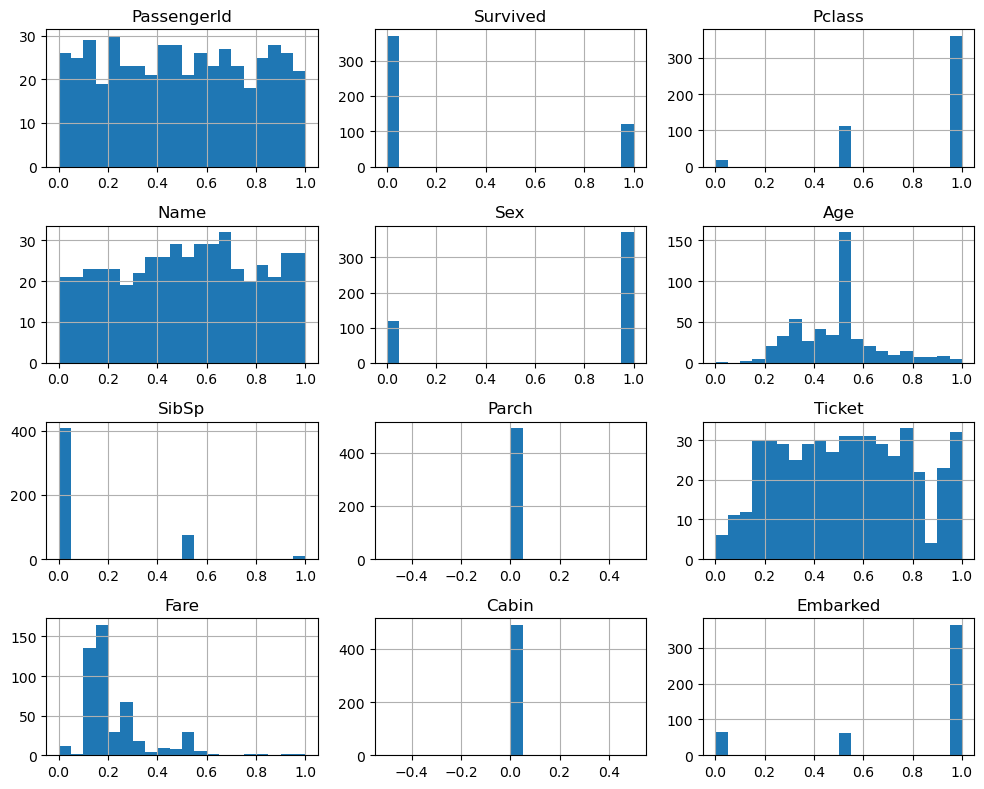

In [41]:
# Histograms for numerical columns
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [42]:
# Final validation
print("Final dataset shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

Final dataset shape: (491, 12)
Missing values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
Duplicate rows: 0
